# Imports

In [1]:
# to automatically reload packages and modules
# handful for quick devlopment
%reload_ext autoreload
%autoreload 2

import numpy as np
import cvxpy as cp
import yfinance as yf
import matplotlib.pyplot as plt
from value_mpt.optimizer.mpt import Optimizer


# Main

[*********************100%***********************]  4 of 4 completed


Optimal portfolio return: 0.3347320974221981
Optimal portfolio weights: [0.28752863 0.09205493 0.10515575 0.51526069]
Optimal portfolio risk (Standard deviation): 0.2369583599055026
Sharpe ratio: 1.2860153891330242


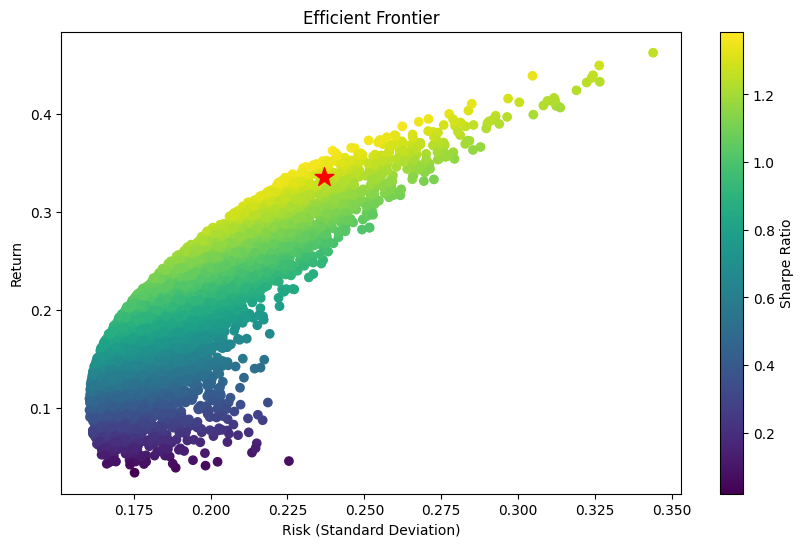

Top 3 Stocks with the highest weights:
Ticker: 8230.SR, Weight: 51.53%
Ticker: 2222.SR, Weight: 28.75%
Ticker: 1120.SR, Weight: 10.52%


In [2]:
tickers = ['2222.SR', '2010.SR', '1120.SR', '8230.SR']
years = 5
risk_tolerance = 0.5

# Test the optimal_portfolio_selector method with different regularization coefficients
# coefficients = [0.1, 0.3, 0.5]

# for coeff in coefficients:
#     optimizer = Optimizer(tickers, years, risk_tolerance)
#     optimal_return, optimal_weights, optimal_risk = optimizer.optimal_portfolio_selector(coeff)
#     print(f"Regularization Coefficient: {coeff}")
#     print(f"Optimal Portfolio Return: {optimal_return}")
#     print(f"Optimal Portfolio Weights: {optimal_weights}")
#     print(f"Optimal Portfolio Risk (Standard Deviation): {optimal_risk}")

# Instance of the optimizer class
mpt = Optimizer(tickers, years, risk_tolerance)

# Find the optimal portfolio
optimal_return, optimal_weights, optimal_risk = mpt.optimal_portfolio_selector()

print("Optimal portfolio return:", optimal_return)
print("Optimal portfolio weights:", optimal_weights)
print("Optimal portfolio risk (Standard deviation):", optimal_risk)

# Sharpe ratio
risk_free_rate = 0.03  # For a rate of 3%
sharpe_ratio = (optimal_return - risk_free_rate) / optimal_risk
print("Sharpe ratio:", sharpe_ratio)

# Efficient frontier
returns = mpt.get_returns().values
cov_matrix = mpt.get_cov_matrix().values
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_risk = np.sqrt(portfolio_variance)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    results[0, i] = portfolio_return
    results[1, i] = portfolio_risk
    results[2, i] = sharpe_ratio

# Efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_risk, optimal_return, color='red', marker='*', s=200)  # Highlight the optimal portfolio
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

# Rank the top 3 stocks with the highest weights
top_indices = np.argsort(optimal_weights)[-3:][::-1]  # Top 3 weights in descending order
print("Top 3 Stocks with the highest weights:")
for i in top_indices:
    print(f"Ticker: {tickers[i]}, Weight: {optimal_weights[i]*100 :.2f}%")